In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('CarPrice_Assignment.csv')

features = ["enginesize", "horsepower", "curbweight", "citympg", "highwaympg"]
target = ["price"]

x=df[features]
y = df["price"]

x=x.fillna(x.mean())
y=y.fillna(y.mean())

In [41]:
m=len(df)
split_index = int(0.8*m)
x_train = x.iloc[:split_index].values
y_train = y.iloc[:split_index].values
x_test = x.iloc[split_index:].values
y_test = y.iloc[split_index:].values

In [42]:
mu = np.mean(x_train, axis=0)
sigma = np.std(x_train, axis=0)
x_train=(x_train-mu)/sigma
x_test=(x_test-mu)/sigma

In [43]:
def predict(x, w, b):
    return np.dot(x, w) + b

In [44]:
def compute_cost(x, y, w, b):
    m = len(y)
    predictions = predict(x, w, b)
    return (1/(2*m)*np.sum((predictions-y)**2))

In [45]:
def compute_gradient(x, y, w, b):
    m = len(y)
    predictions = predict(x, w, b)
    dj_dw = (1/m)*np.dot(x.T, (predictions-y))
    dj_db = (1/m)*np.sum(predictions-y)
    return dj_dw, dj_db

In [46]:
def gradient_descent(x, y, w, b, alpha, iter):
    cost_history = []
    for i in range(iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)
    return w, b, cost_history

In [47]:

n = x_train.shape[1]
w_init = np.zeros(n)
b_init = 0
alpha = 0.01
iter = 1000
w_final, b_final, cost_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, iter)

<function matplotlib.pyplot.show(close=None, block=None)>

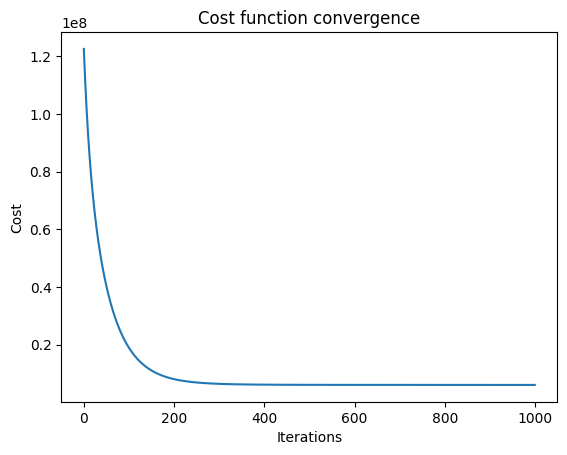

In [48]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost function convergence")
plt.show

Train RMSE: 3473.12205296297
Test RMSE: 3409.772432181558


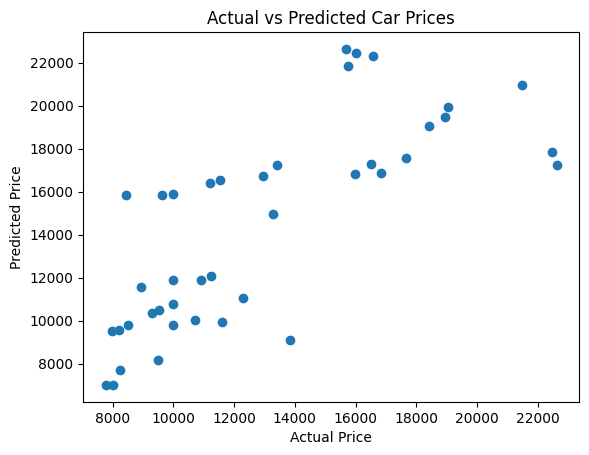


 [3884.56626348 2501.52746262 2203.37890928  102.77670513   82.95147296] 
 13357.695666475076


In [49]:
train_predictions = predict(x_train, w_final, b_final)
test_predictions = predict(x_test, w_final, b_final)

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

print("Train RMSE:", rmse(y_train, train_predictions))
print("Test RMSE:", rmse(y_test, test_predictions))

plt.scatter(y_test, test_predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

print("\n", w_final,"\n", b_final)